<script type="text/x-mathjax-config">
MathJax.Hub.Config({
  TeX: { equationNumbers: { autoNumber: "AMS" } }
});
</script>

ガウス分布こと正規分布は、以下の式で定義される最も基本的かつ重要な確率分布です。

$$
\begin{align}
p(x)= \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left\{ -\frac{(x - \mu)^2 }{ 2 \sigma^2 } \right\}
\end{align}
$$

$x$は確率変数、$\mu$は平均、$\sigma^2$は分散です。


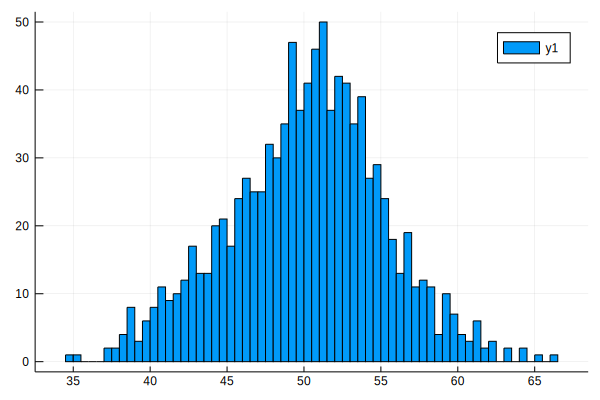

In [7]:
# box-muller法によるサンプリング
using Random
using Plots

function box_muller(μ::T, σ::T, n::Integer) where {T<:Real}
    sample = zeros(T, n)
    for i=1:n
        r₁ = rand()
        r₂ = rand()
        x = sqrt(-2log(r₁)) * sin(2π*r₂)
        sample[i] = μ + σ*x
    end
    return sample
end

μ = 50.
σ = 5.
n = 1000

sample = box_muller(μ, σ, n)

histogram(sample, bins=100)

上で示した単変量の正規分布の扱いは簡単だけど、多変量になった途端扱いが大変だなぁと思ったので正規化定数の導出までを今回はまとめます。

## 多変量ガウス分布の定義

$n$次元の確率変数ベクトル${\boldsymbol x}=(x_1, x_2, \ldots , x_n)$が平均${\boldsymbol \mu}$、共分散行列${\boldsymbol \Sigma}$の多変量ガウス分布に従うとき、その確率密度関数は

$$
\begin{align}
p({\boldsymbol x} | {\boldsymbol \mu}, {\boldsymbol \Sigma})= \frac{1}{\left( \sqrt{2 \pi} \right)^n  \sqrt{\det \Sigma}} \exp \left\{ -\frac{1}{2} \left({\boldsymbol x}- {\boldsymbol \mu} \right)^{\mathrm T} \Sigma^{-1} \left({\boldsymbol x}- {\boldsymbol \mu} \right) \right\}
\end{align}
$$

で定義される。

## 多変量ガウス分布を理解するための数学の準備
多変量ガウス分布をすっきり理解するために、いくつか数学の準備をしておきましょう。

#### 単変数のガウス積分

$a$を正の定数として、変数$x$に関して
$$
\begin{align}
I = \int_{-\infty}^{\infty} e^{-ax^2} \mathrm{d}x
\end{align}
$$
で書かれる積分をガウス積分といいます。

これが
$$
\begin{align}
 \int_{-\infty}^{\infty} e^{-ax^2} \mathrm{d}x = \sqrt{\frac{\pi}{a}}
\end{align}
$$

となることを確認します。

$$
\begin{align}
I^2 &= \left( \int_{-\infty}^{\infty} e^{-ax^2} \mathrm{d}x \right)^2  \\
&=\left( \int_{-\infty}^{\infty} e^{-ax^2} \mathrm{d}x \right)\left( \int_{-\infty}^{\infty} e^{-ay^2} \mathrm{d}y \right) \\
&=  \int_{-\infty}^{\infty} \int_{-\infty}^{\infty}  e^{-ax^2-ay^2} \mathrm{d}x \mathrm{d}y
\end{align}
$$

積分順序の交換はフビニの定理を用いました。ここで、

$$
\begin{align}
x &= r \cos \theta \\\
y &= r \sin \theta
\end{align}
$$

と置くと、ヤコビアンは

$$
\begin{align}
\left|
    \begin{array}{cc}
      \frac{\mathrm{d}x}{\mathrm{d}r} & \frac{\mathrm{d}x}{\mathrm{d}\theta} \\
      \frac{\mathrm{d}y}{\mathrm{d}r} & \frac{\mathrm{d}y}{\mathrm{d}\theta} \\
    \end{array}
  \right| 
= \left|
    \begin{array}{cc}
      \cos \theta & r \sin \theta \\
      \sin \theta & r \cos \theta \\
    \end{array}
  \right| 
= r \cos^2 \theta + r \sin^2 \theta = r
\end{align}
$$

となるので、

$$
\begin{align}
\int_{0}^{\infty} \int_{0}^{2\pi}  e^{-ar^2} \cdot r \mathrm{d}\theta \mathrm{d}r &= 2\pi \int_{0}^{\infty} re^{-ar^2}  \mathrm{d}r \\
&= 2\pi \left[\frac{e^{-ar^2}}{-2a} \right]\_{0}^{\infty} = 2\pi \left(0 - \frac{1}{-2a} \right) = \frac{\pi}{a} \\
I &= \sqrt{\frac{\pi}{a}}
\end{align}
$$

#### 二次形式の平方完成

$$
\begin{align}
-&\frac{1}{2} {\boldsymbol x}^{\mathrm T} A {\boldsymbol x} + {\boldsymbol b}^{\mathrm T}{\boldsymbol x}  \\
&= -\frac{1}{2} \left(A^{1/2} {\boldsymbol x} - A^{1/2}{\boldsymbol b} \right)^{\mathrm T} \left(A^{1/2} {\boldsymbol x} - A^{1/2}{\boldsymbol b} \right) + \frac{1}{2} \left( {\boldsymbol b}^{\mathrm T} A^{-1} {\boldsymbol b}  \right)
\end{align}
$$

## 多変数のガウス積分
数学的準備ができたところで多変数のガウス積分をやっていきます。
${\boldsymbol A}$を$n \times n$の正則な対称行列、${\boldsymbol b}$を$n$次元の定数のベクトルとして、$n$次元の変数ベクトル${\boldsymbol x}$に関して、

$$
\begin{align}
I &= \int \exp\left\{ -\frac{1}{2} {\boldsymbol x}^{\mathrm T} A {\boldsymbol x} + {\boldsymbol b}^{\mathrm T} {\boldsymbol x} \right\} \mathrm{d}{\boldsymbol x}
\end{align}
$$

の形の積分を、多変数のガウス積分と呼びます。これが

$$
\begin{align}
I &= \frac{1}{\left( \sqrt{2 \pi} \right)^n  \sqrt{\det A}} \exp \left\{ -\frac{1}{2} {\boldsymbol b}^{\mathrm T} A^{-1} {\boldsymbol b} \right\}
\end{align}
$$

となることを確認します。


$$
\begin{align}
I &= \int \exp \left\{-\frac{1}{2} {\boldsymbol x}^{\mathrm T} A {\boldsymbol x} + {\boldsymbol b}^{\mathrm T} {\boldsymbol x} \right\} {\mathrm d}{\boldsymbol x}
\end{align}
$$

2次形式の平方完成より

$$
\begin{align}
I &= \int \exp \left\{-\frac{1}{2} \left(A^{1/2}{\boldsymbol x} - A^{-1/2}{\boldsymbol b} \right)^{\mathrm T} \left(A^{1/2}{\boldsymbol x} - A^{-1/2}{\boldsymbol b}  \right) + \frac{1}{2}{\boldsymbol b}^{\mathrm T}A^{-1}{\boldsymbol b} \right\} {\mathrm d}{\boldsymbol x} \\
&= \exp \left\{\frac{1}{2}{\boldsymbol b}^{\mathrm T}A^{-1}{\boldsymbol b} \right\} \int \exp \left\{-\frac{1}{2} \left(A^{1/2}{\boldsymbol x} - A^{-1/2}{\boldsymbol b} \right)^{\mathrm T} \left(A^{1/2}{\boldsymbol x} - A^{-1/2}{\boldsymbol b}  \right)  \right\} {\mathrm d}{\boldsymbol x}
\end{align}
$$

ここで、

$$
\begin{align}
{\boldsymbol y} &= A^{1/2}{\boldsymbol x} - A^{-1/2}{\boldsymbol b}
\end{align}
$$

とおくと、

$$
\begin{align}
{\boldsymbol x} &= A^{1/2}{\boldsymbol y} + A^{-1}{\boldsymbol b}
\end{align}
$$

なので、この時のヤコビアンは

$$
\begin{align}
\frac{\partial {\boldsymbol x}}{\partial {\boldsymbol y}} &= \det A^{-1/2} = \left(\det A \right)^{-1/2}
\end{align}
$$

より、

$$
\begin{align}
I & = \exp \left\{\frac{1}{2}{\boldsymbol b}^{\mathrm T}A^{-1}{\boldsymbol b} \right\} \int \exp \left\{-\frac{1}{2} {\boldsymbol y}^{\mathrm T} {\boldsymbol y} \cdot \left(\det A \right)^{-1/2}  \right\} {\mathrm d}{\boldsymbol y} \\
&= \left(\det A \right)^{-1/2} \cdot \exp \left\{\frac{1}{2}{\boldsymbol b}^{\mathrm T}A^{-1}{\boldsymbol b} \right\}  \int \exp \left\{-\frac{1}{2} {\boldsymbol y}^{\mathrm T} {\boldsymbol y} \right\} {\mathrm d}{\boldsymbol y} \\
&= \frac{1}{\left( \sqrt{2 \pi} \right)^n  \sqrt{\det A}} \exp \left\{ -\frac{1}{2} {\boldsymbol b}^{\mathrm T} A^{-1} {\boldsymbol b} \right\}
\end{align}
$$

最後の式変形には、1変数のガウス積分を用いました。

多変量ガウス分布では$\Sigma=A$、${\boldsymbol b} = 0$より、

$$
\begin{align}
I & = \frac{1}{\left( \sqrt{2 \pi} \right)^n  \sqrt{\det \Sigma}} 
\end{align}
$$

となり、多変量ガウス分布の正規化定数が求まりました。


あまりに記事が長くなりすぎるのでいったんここで区切ります。
次から実際に分布を弄って、周辺化、条件付き分布を導出しようと思います。

# 参考
ガウス過程と機械学習

[Wikipedia: 多変量正規分布](https://ja.wikipedia.org/wiki/%E5%A4%9A%E5%A4%89%E9%87%8F%E6%AD%A3%E8%A6%8F%E5%88%86%E5%B8%83:title)

[https://mathtrain.jp/gauss:title]

[https://mathtrain.jp/multi_gauss-2:title]

ヤコビアンに関してはヨビノリたくみさんのyoutube動画がお勧め。
<iframe width="560" height="315" src="https://www.youtube.com/embed/Iu8jVdkiKTc" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>